In [2]:
#Necessary Imports
import os
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
#reading the data
train_data = pd.read_csv('traindata_without_target.csv')
train_weather = pd.read_csv('train_weather.csv')
farm_data = pd.read_csv('farm_data.csv')

In [7]:
train_data.head()

,date,farm_id,ingredient_type
0,2016-01-01 00:00:00,fid_110884,ing_w
1,2016-01-01 00:00:00,fid_90053,ing_w
2,2016-01-01 00:00:00,fid_17537,ing_w
3,2016-01-01 00:00:00,fid_110392,ing_w
4,2016-01-01 00:00:00,fid_62402,ing_w


In [8]:
train_weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6


In [10]:
farm_data.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369


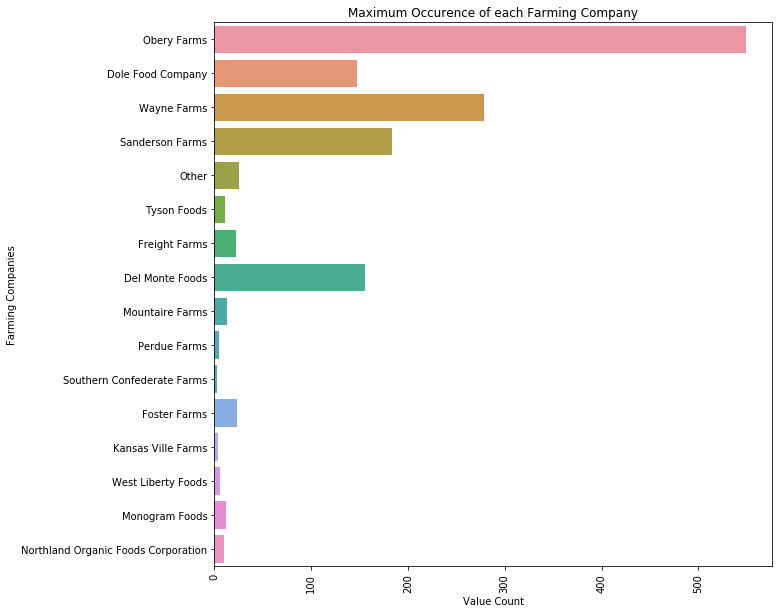

Obery Farms                            549
Wayne Farms                            279
Sanderson Farms                        184
Del Monte Foods                        156
Dole Food Company                      147
Other                                   25
Foster Farms                            23
Freight Farms                           22
Mountaire Farms                         13
Monogram Foods                          12
Tyson Foods                             11
Northland Organic Foods Corporation     10
West Liberty Foods                       6
Perdue Farms                             5
Kansas Ville Farms                       4
Southern Confederate Farms               3
Name: farming_company, dtype: int64

In [27]:
#Countplot to display the observations/max occurence in 'farming_company' column
plt.figure(figsize=(10,10))
sns.countplot(y="farming_company", data= farm_data )
plt.title("Maximum Occurence of each Farming Company")
plt.ylabel("Farming Companies")
plt.xlabel("Value Count")
plt.xticks(rotation=90)
plt.show()

#Unique value count of the farming_company column
farm_data.farming_company.value_counts()


From the above visualization it is clear that the Top 5 farming companies contributing to the growth are **1)Obery Farms**  **2)Wayne Farms**
**3)Sanderson Farms**  **4)Del Monte Foods** **&** **5) Dole Food Company**

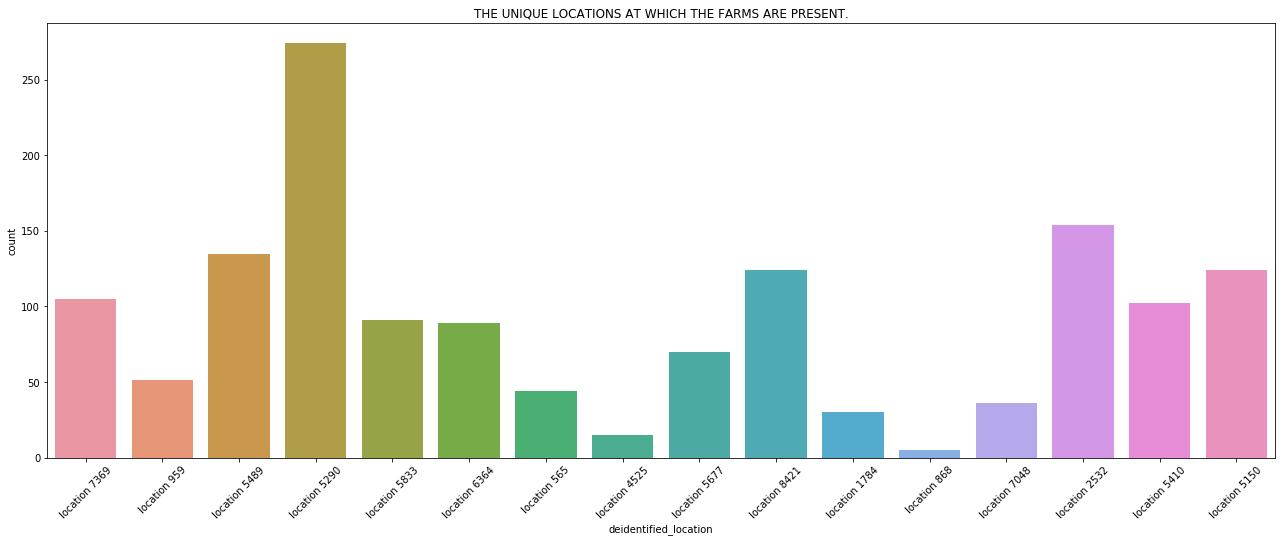

location 5290    274
location 2532    154
location 5489    135
location 5150    124
location 8421    124
location 7369    105
location 5410    102
location 5833     91
location 6364     89
location 5677     70
location 959      51
location 565      44
location 7048     36
location 1784     30
location 4525     15
location 868       5
Name: deidentified_location, dtype: int64

In [28]:
#Count Plot to display the Unique locations
plt.figure(figsize=(22,8))
sns.countplot(x="deidentified_location", data= farm_data)
plt.title("THE UNIQUE LOCATIONS AT WHICH THE FARMS ARE PRESENT.")
plt.xticks(rotation = 45)
plt.show()

# Value count of unique locations
farm_data.deidentified_location.value_counts()



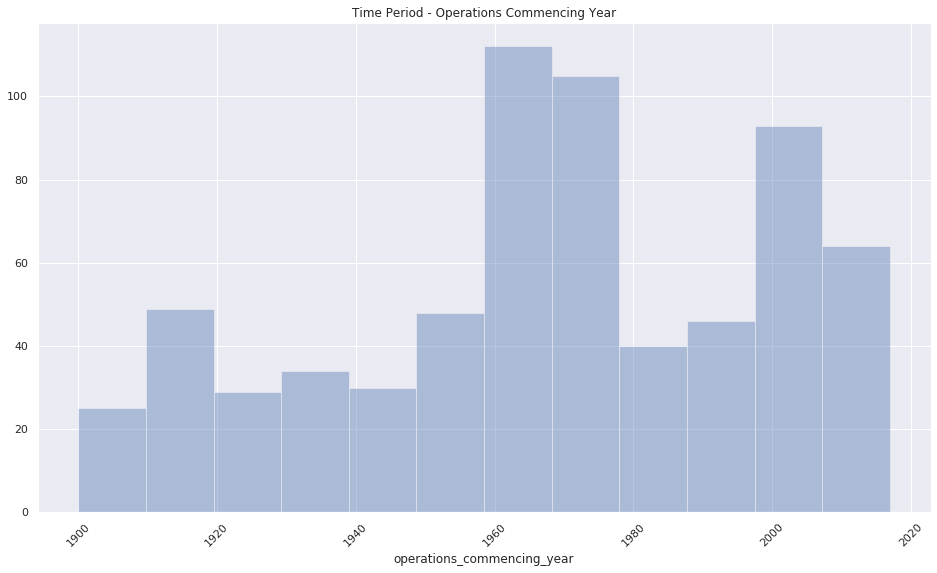

In [29]:
#Plot for distribution of the Operations Commencing Year to check the time period.
plt.figure(figsize=(16,9))
sns.set(style="darkgrid")
sns.distplot(farm_data['operations_commencing_year'],kde = False, hist = True)
plt.xticks(rotation=45)
plt.title('Time Period - Operations Commencing Year')
plt.show()

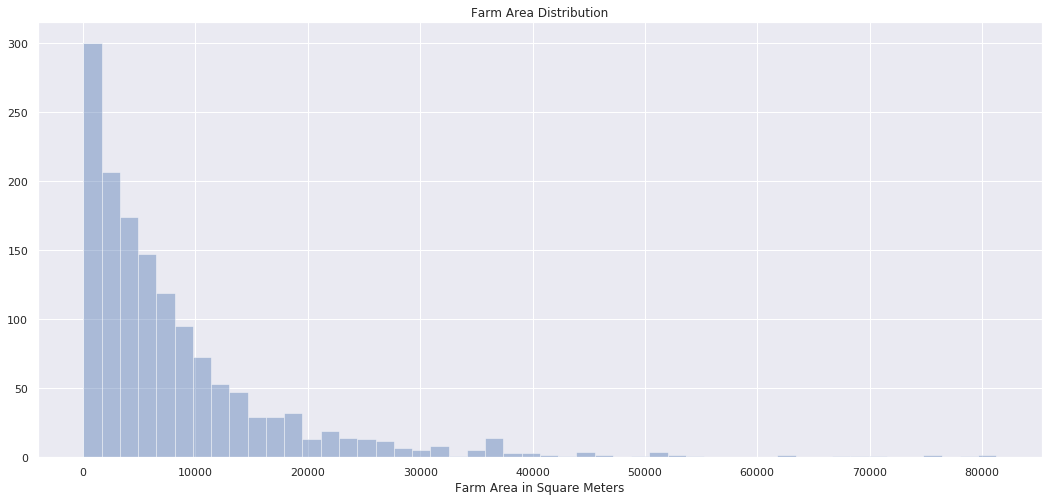

In [30]:
#Plot for distribution of Farm Area.
plt.figure(figsize=(18,8))
sns.set(style="darkgrid")
sns.distplot(farm_data['farm_area'], kde = False)

plt.xlabel("Farm Area in Square Meters")
plt.xticks(rotation= 0)

plt.title('Farm Area Distribution')
plt.show()

Weather Data -

In [32]:
# Train Weather Dataset Analysis
train_weather.nunique(axis = 0, dropna = False)

timestamp                8784
deidentified_location      16
temp_obs                  620
cloudiness                 11
wind_direction             44
dew_temp                  523
pressure_sea_level        710
precipitation             129
wind_speed                 59
dtype: int64

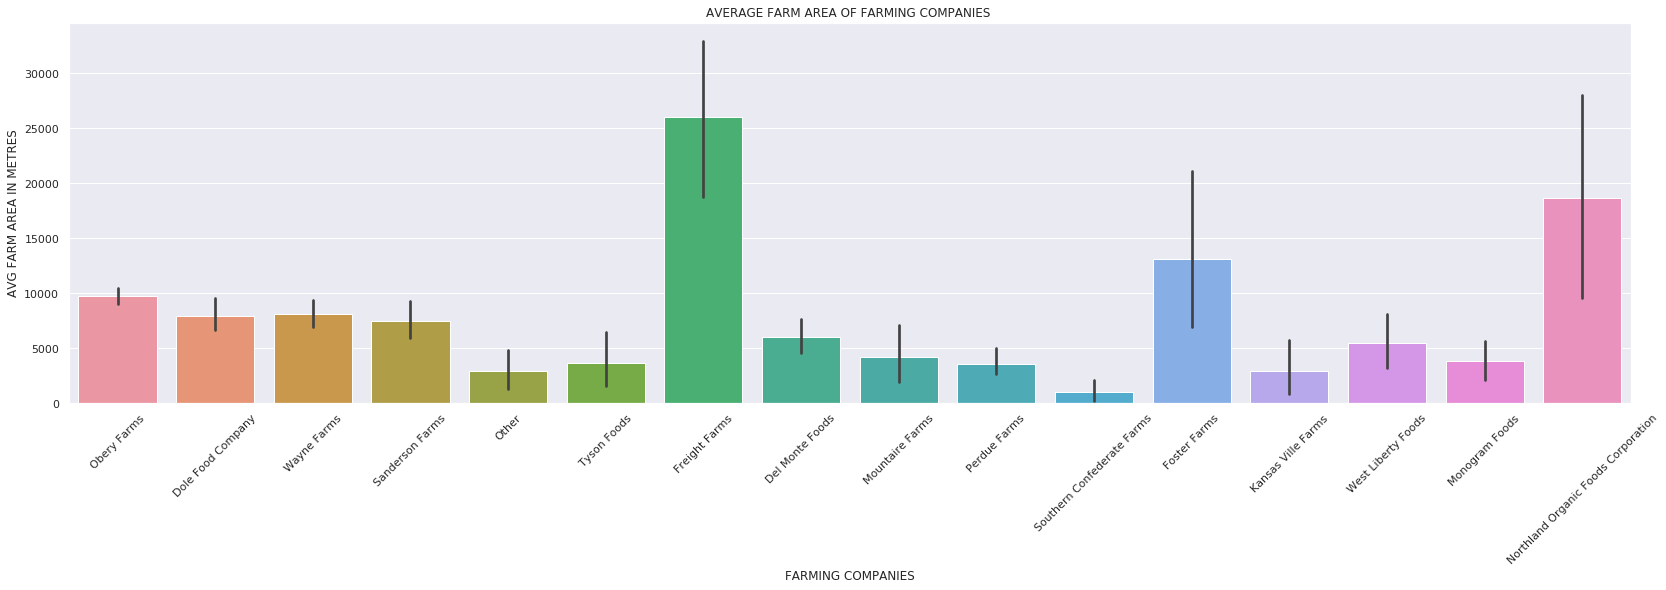

In [35]:
#Bar Plot which depicts the avg farm area possessed
plt.figure(figsize = (28,7))
sns.barplot(x = 'farming_company', y = 'farm_area', data = farm_data)
plt.xlabel('FARMING COMPANIES')
plt.ylabel('AVG FARM AREA IN METRES')
plt.xticks(rotation= 45)

plt.title('AVERAGE FARM AREA OF FARMING COMPANIES ')
plt.show()

In [37]:
# In Which Location the Farm Area is maximum
df2 = farm_data.groupby(['deidentified_location'])['farm_area'].sum().reset_index()
#df.reset_index()
df2.sort_values('farm_area', ascending = False)


,deidentified_location,farm_area
4,location 5290,1.916548e+06
1,location 2532,1.836198e+06
13,location 8421,1.668947e+06
6,location 5489,1.248449e+06
3,location 5150,9.667720e+05
5,location 5410,9.012861e+05
12,location 7369,8.427637e+05
9,location 5833,7.851918e+05
2,location 4525,4.509993e+05
10,location 6364,3.936769e+05


Weather Data -

In [38]:
#The Avg Pressure Sea level and Avg Observed temp at different locations.
df3 = train_weather.groupby(['deidentified_location'])['pressure_sea_level','temp_obs'].mean().reset_index()
#df.reset_index()
df3.sort_values('pressure_sea_level', ascending = False)


,deidentified_location,pressure_sea_level,temp_obs
8,location 5677,1017.988378,22.836021
12,location 7369,1017.988378,22.836021
4,location 5290,1017.938692,15.520579
7,location 565,1017.527954,15.141678
3,location 5150,1016.980579,9.357618
9,location 5833,1016.887750,15.236366
13,location 8421,1016.625114,21.367499
5,location 5410,1016.377985,13.258409
15,location 959,1015.989795,11.711801
1,location 2532,1015.895371,9.879617


In [40]:
#The Maximum percipitation and dew point temp at the deidentified locations 
df4 = train_weather.groupby(['deidentified_location'])['precipitation','dew_temp'].max().reset_index()
#df.reset_index()
df4.sort_values('precipitation', ascending = False)


,deidentified_location,precipitation,dew_temp
8,location 5677,343.0,25.6
12,location 7369,343.0,25.6
3,location 5150,333.0,24.4
2,location 4525,262.0,22.9
14,location 868,262.0,22.9
1,location 2532,216.0,25.0
13,location 8421,203.0,26.1
4,location 5290,198.0,26.1
7,location 565,198.0,24.4
5,location 5410,150.0,25.6


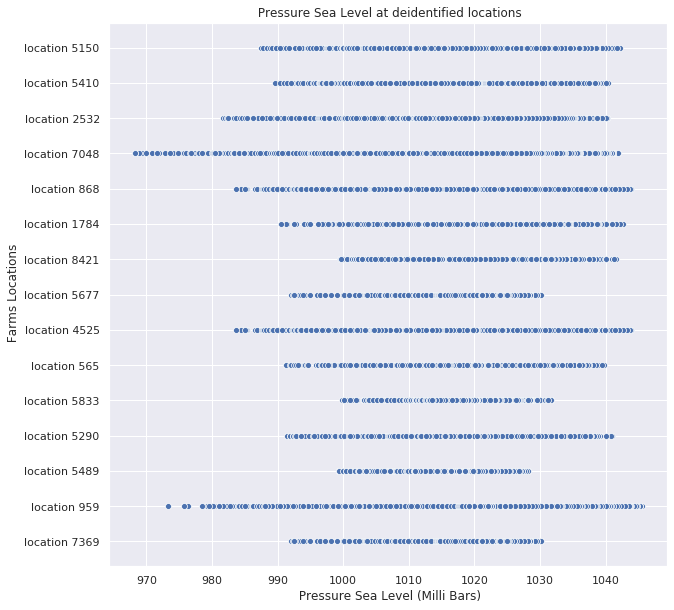

In [44]:
#Plot between 'pressure_sea_level' vs 'deidentified locations'
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.scatterplot(x ='pressure_sea_level', y = 'deidentified_location', data= train_weather,ci= 95,n_boot=1000,markers=True, 
                style_order=None )
plt.title(" Pressure Sea Level at deidentified locations")
plt.xlabel(' Pressure Sea Level (Milli Bars)')
plt.ylabel(' Farms Locations')


plt.show()